# Introduction

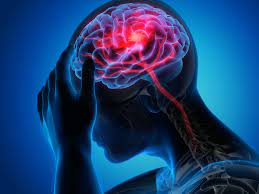

Welcome, to this notebook that talking about stroke and what is affecting it. 

we have about 12 pieces of info about who stroke and who didn't have a stroke, I think this data is missing some information about blood pressure and more things that will make this dataset more exciting.

But no problem, something better than nothing, I'll try to make a good notebook that maybe will give you new information about stroke.

#Missing data

before we start this notebook and build an ML model, there's about 200 missing value for BMI, I will use an ML algorithm to predict these missing value to help us to complete this notebook successfully.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


> As you see there is 201 missing bmi values

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

> here we are predicting these missing values

In [4]:
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [5]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Correlation

Now, before we start I'll show you the correlation between these features.

As we see there is no good correlation between these features, the best correlation is between stroke and age and it's not very good.

Because of that, I say this dataset is missing some additional information, but something better than nothing.

<AxesSubplot:>

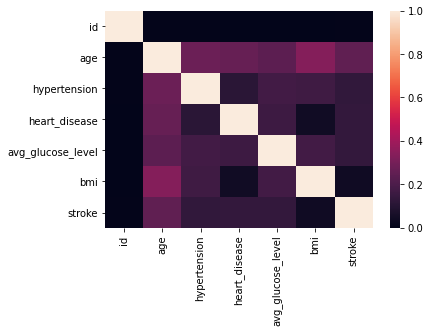

In [6]:
sns.heatmap(data=df.corr())

In [7]:
plt.style.use('ggplot')

#Gender 

look, when we try plotting the gender and who have stroke we didn't see any information about how is gender can affect the stroke.

I don't know if gender can affect the stroke or not, but what I saw told us that gender can't affect the stroke If you have different information share this information in the comments.

<AxesSubplot:xlabel='gender', ylabel='count'>

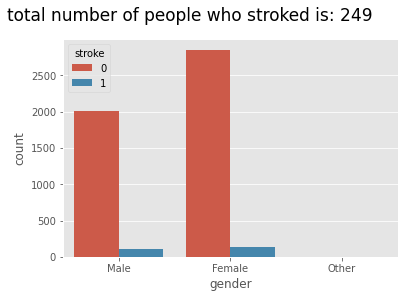

In [8]:
total = df.loc[df['stroke'] == 1]['stroke'].sum()
plt.text(-1,3250,f'total number of people who stroked is: {total}',fontsize=17)
sns.countplot(data=df,x='gender',hue='stroke')

# Age

Now, let's talk about the best correlations in these features. Age will notice when we look at the graphs below that is **people who are older than 40 years at risk of stroke** than who are younger than 40 years.

> Also, when you got older you are at more risk of stroke.

In [9]:
print(df.loc[df['stroke'] == 1]['age'].describe())
print('-'*100)
print(df.loc[df['stroke'] == 0]['age'].describe())

count    249.000000
mean      67.728193
std       12.727419
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------
count    4861.000000
mean       41.971545
std        22.291940
min         0.080000
25%        24.000000
50%        43.000000
75%        59.000000
max        82.000000
Name: age, dtype: float64


<AxesSubplot:title={'center':'People who have stroke'}, xlabel='age', ylabel='Count'>

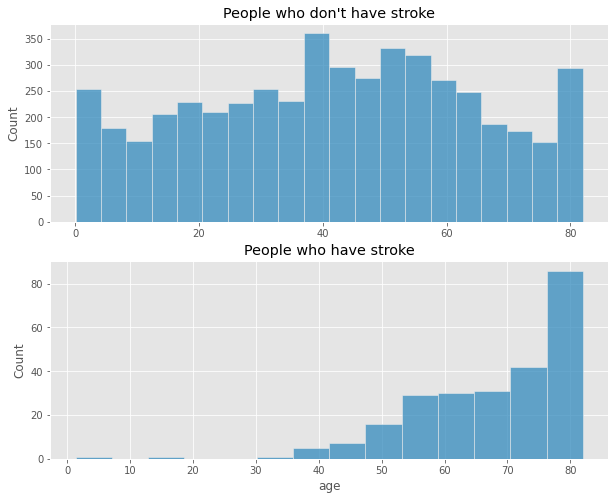

In [10]:
fig = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.title("People who don't have stroke")
sns.histplot(data=df.loc[df['stroke'] == 0],x='age')
plt.xlabel('')
plt.subplot(212)
plt.title("People who have stroke")
sns.histplot(data=df.loc[df['stroke'] == 1],x='age')

# Hypertension

As we see below, most of those who have a stroke don't have hypertension, and that makes the **ischemic stroke**.

this type of stroke happens when there is an issue or defect in blood quantity that came to the brain, and this is a popular type of stroke.

> It happens when a little quantity of blood arrived in the brain.

 ischemic stroke :

this type of stroke is constituted 80% of strokes that happen, this stroke happens with blood-vessel got tight or closed completely or closed molecule. so that makes huge low blood quantity that supplies to the brain (Ischemia). and that prevents supply the brain with oxygen and food, so that makes the brain's cells die in few minutes

look at ischemic stroke.

![](http://www.op2lysis.com/wp-content/uploads/2018/02/AVC_Visuel_VA.png)

<AxesSubplot:xlabel='hypertension', ylabel='Count'>

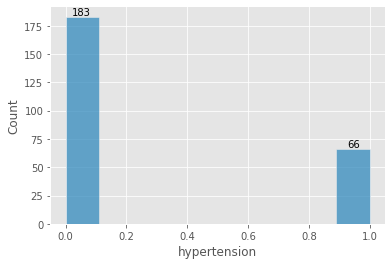

In [11]:
query = df.loc[df['stroke'] == 1]
x = query.groupby('hypertension')['hypertension'].count()[0]
y = query.groupby('hypertension')['hypertension'].count()[1]
plt.text(x=0.02,y=x+1,s=x,fontsize=10)
plt.text(x=.925,y=y+2,s=y,fontsize=10)
sns.histplot(data=query,x='hypertension')

# Heart disease

As we see no correlations between heart disease and stroke.


Most of have stroke they haven't heart disease.

In [12]:
query = df.loc[df['stroke'] == 1]
query.groupby('heart_disease')['heart_disease'].describe()

,count,mean,std,min,25%,50%,75%,max
heart_disease,,,,,,,,
0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


# ever_married

As we see below, most of the people who had a stroke were married.

and that's making us ask what is the correlation between marriage and stroke, maybe a lot of thinking about the family and the children's schools, health, education, economic.

And a lot of thinking makes the brain tired.

because of that, don't marry :) 

<AxesSubplot:xlabel='ever_married', ylabel='count'>

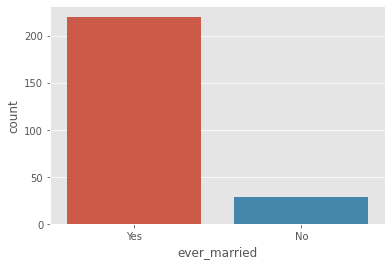

In [13]:
query = df.loc[df['stroke'] == 1]
sns.countplot(data=query,x='ever_married') 

# Work type

Look at most of those who have a stroke working in a private job or self-employed.

Also here, that is making us ask ourselves what made them have a stroke, as we know in the private job and self-employed job the total hours of work is higher than government job that put the person's brain in a long time for working, day by day and week by week, long hours of work make the brain get tired, so happened what we were afraid of.

In [14]:
query.groupby('work_type')['work_type'].count()

work_type
Govt_job          33
Private          149
Self-employed     65
children           2
Name: work_type, dtype: int64

Text(10, 3, '2')

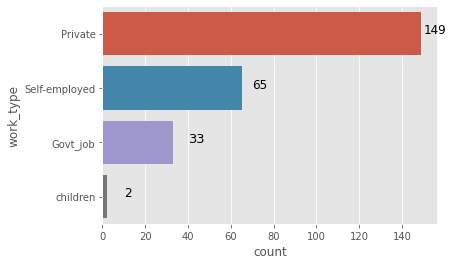

In [15]:
query = df.loc[df['stroke'] == 1]
sns.countplot(data=query,y='work_type')
govt_work = query.groupby('work_type')['work_type'].count()[0]
privte = query.groupby('work_type')['work_type'].count()[1]
self_employed = query.groupby('work_type')['work_type'].count()[2]
children = query.groupby('work_type')['work_type'].count()[3]
plt.text(x=40,y=2,s=govt_work,fontsize=13)
plt.text(x=150,y=0,s=privte,fontsize=12)
plt.text(x=70,y=1,s=self_employed,fontsize=12)
plt.text(x=10,y=3,s=children,fontsize=12)

As we will be seeing in few seconds that other features didn't affect hugely on the stroke, because of that we will not talk about, and we will delete these features from the dataset when we going to train our model.

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

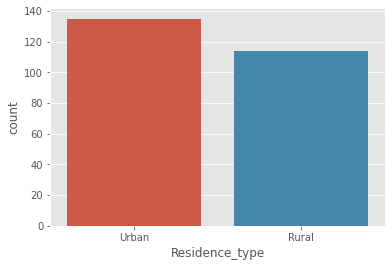

In [16]:
query = df.loc[df['stroke'] == 1]
sns.countplot(data=query,x='Residence_type')

In [17]:
have_stroke = df.loc[df['stroke'] == 1]
non_stroke = df.loc[df['stroke'] == 0]
print(have_stroke.describe()['avg_glucose_level'])
print('-'*100)
print('-'*100)
print(non_stroke.describe()['avg_glucose_level'])

count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
count    4861.000000
mean      104.795513
std        43.846069
min        55.120000
25%        77.120000
50%        91.470000
75%       112.830000
max       267.760000
Name: avg_glucose_level, dtype: float64


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

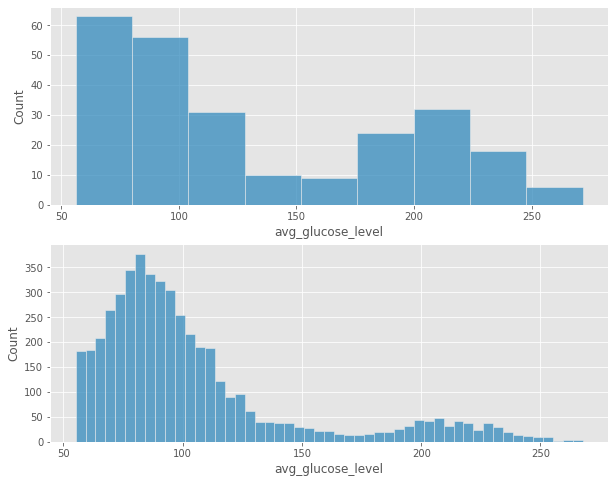

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.histplot(data=have_stroke,x='avg_glucose_level')
plt.subplot(212)
sns.histplot(data=non_stroke,x='avg_glucose_level')

In [19]:
have_stroke = df.loc[df['stroke'] == 1]
non_stroke = df.loc[df['stroke'] == 0]
print(have_stroke.describe()['bmi'])
print('-'*100)
print('-'*100)
print(non_stroke.describe()['bmi'])

count    249.000000
mean      30.336552
std        5.885467
min       16.900000
25%       27.000000
50%       29.817949
75%       32.800000
max       56.600000
Name: bmi, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
count    4861.000000
mean       28.845767
std         7.808223
min        10.300000
25%        23.500000
50%        28.100000
75%        32.900000
max        97.600000
Name: bmi, dtype: float64


<AxesSubplot:xlabel='bmi', ylabel='Count'>

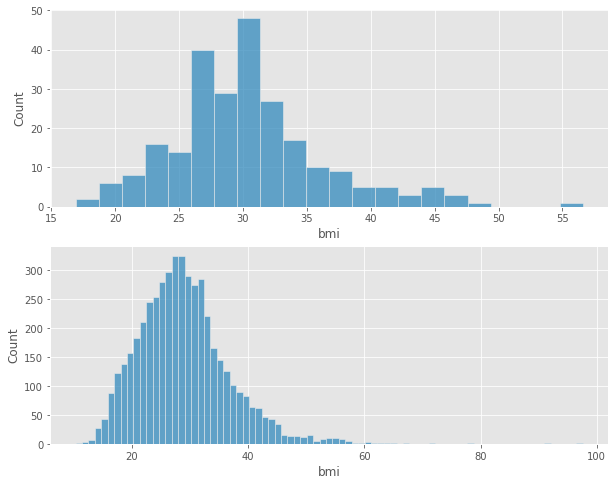

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.histplot(data=have_stroke,x='bmi')
plt.subplot(212)
sns.histplot(data=non_stroke,x='bmi')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

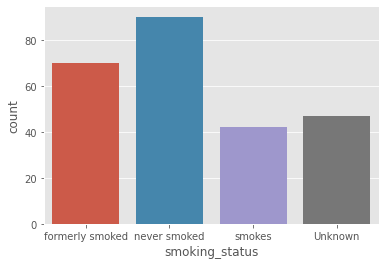

In [21]:
query = df.loc[df['stroke'] == 1]
sns.countplot(data=query,x='smoking_status') 

# Model


In [22]:
df['gender'] = df['gender'].map({'Female':0,'Male':1,'Other':2})
df['work_type'] = df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
df['ever_married'] = df['ever_married'].map({'No':0,'Yes':1})

In [23]:
features = ['gender','work_type','ever_married','age','hypertension','heart_disease','avg_glucose_level']
features = df[list(features)]
label = df['stroke'].values

In [24]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(features,label,test_size=0.3,random_state=114)

In [25]:
print('X train Shape: ',Xtrain.shape)
print('Y train Shape: ',Ytrain.shape)
print('X test Shape: ',Xtest.shape)
print('Y test Shape: ',Ytest.shape)

X train Shape:  (3577, 7)
Y train Shape:  (3577,)
X test Shape:  (1533, 7)
Y test Shape:  (1533,)


> I'll use diffrent algorthim to train the model naive baies , RandomForestClassifier , VotingCalssifier , LogisticRegression and SVC

> **BernolliNB** 

In [26]:
model = BernoulliNB()

In [27]:
model.fit(Xtrain,Ytrain)

BernoulliNB()

In [28]:
print('BernoulliNB score is: ',np.round(model.score(Xtest,Ytest)*100,decimals=2))

BernoulliNB score is:  95.04


> **RandomForestClassifier**

In [29]:
model = RandomForestClassifier()
model.fit(Xtrain,Ytrain)
print('RandomForestClassifier score is: ',np.round(model.score(Xtest,Ytest)*100,decimals=2))

RandomForestClassifier score is:  94.26


> **LogisticRegression**

In [30]:
model = LogisticRegression(penalty='l1',solver='saga')
model.fit(Xtrain,Ytrain)
print('LogisticRegression score is: ',np.round(model.score(Xtest,Ytest)*100,decimals=2))

LogisticRegression score is:  95.37


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


> **SVC**

In [31]:
svc = SVC()
svc.fit(Xtrain,Ytrain)
print('svc score is: ',np.round(svc.score(Xtest,Ytest)*100,decimals=2))

svc score is:  95.37


# Finale


After we analyzed the data and trained our model, we discover and learn new things about stroke and what effect on it.

We learned about ischemic stroke and how this stroke happened, we now know that low blood quantity affects the stroke.

As we notice we have a lot of patients but just about 200 of these patients have a stroke, which makes prejudice in our model, because of that we have to add new patients that have a stroke, to give our model a clear view about stroke.

before we finish, here all algorithms that we used gave us the same score, because of that you can choose anyone and work with.

Goodbye.